<a href="https://colab.research.google.com/github/Pzzrtt/Maksim-Mixailov/blob/main/site/en/tutorials/quickstart/beginner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2019 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Описание MNIST dataset

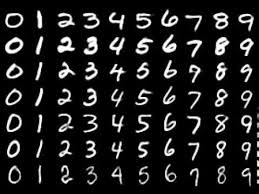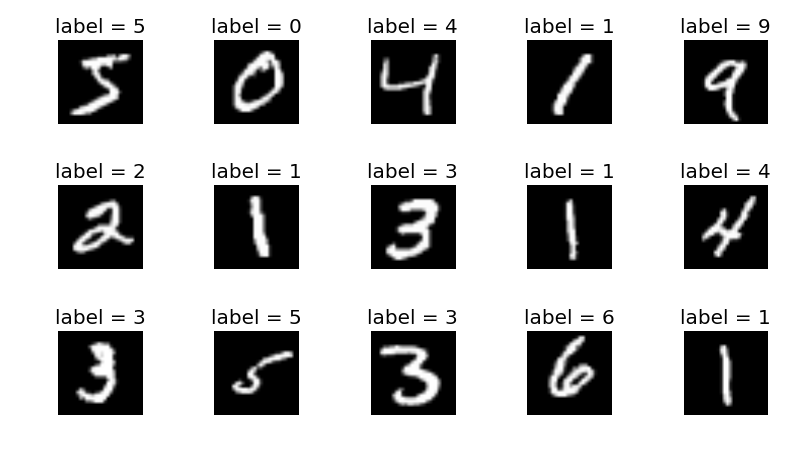

Набор данных MNIST — это коллекция из 70 000 изображений рукописных цифр от 0 до 9 в оттенках серого, размером 28x28 пикселей. Он состоит из 60 000 изображений для обучения и 10 000 для тестирования моделей машинного обучения, и широко используется в качестве основы для обучения систем распознавания изображений. Каждое изображение центрировано, нормализовано и содержит 784 значения пикселей, где каждое значение представляет собой интенсивность от 0 (белый) до 255 (черный).
Основные характеристики
Содержание: 70 000 изображений рукописных цифр от 0 до 9.
Размер: Каждое изображение имеет размер 28x28 пикселей.
Цветность: Черно-белое, в оттенках серого.
Разделение на выборки: 60 000 изображений для обучения и 10 000 для тестирования.
Данные: Каждое изображение представлено как одномерный массив из 784 значений (28x28), где каждое значение — интенсивность пикселя от 0 до 255.
Историческая справка и использование
Происхождение: Набор данных создан путем модификации набора образцов Национального института стандартов и технологий (NIST).
Применение: Изначально создан для тестирования систем распознавания цифр и сегодня широко используется в качестве начального набора для обучения моделей машинного обучения из-за своей простоты.

# TensorFlow 2 quickstart for beginners

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/quickstart/beginner"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This short introduction uses [Keras](https://www.tensorflow.org/guide/keras/overview) to:

1. Load a prebuilt dataset.
1. Build a neural network machine learning model that classifies images.
2. Train this neural network.
3. Evaluate the accuracy of the model.

This tutorial is a [Google Colaboratory](https://colab.research.google.com/notebooks/welcome.ipynb) notebook. Python programs are run directly in the browser—a great way to learn and use TensorFlow. To follow this tutorial, run the notebook in Google Colab by clicking the button at the top of this page.

1. In Colab, connect to a Python runtime: At the top-right of the menu bar, select *CONNECT*.
2. To run all the code in the notebook, select **Runtime** > **Run all**. To run the code cells one at a time, hover over each cell and select the **Run cell** icon.

![Run cell icon](https://github.com/tensorflow/docs/blob/master/site/en/tutorials/quickstart/images/beginner/run_cell_icon.png?raw=1)

## Set up TensorFlow

Import TensorFlow into your program to get started:

In [37]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.19.0


If you are following along in your own development environment, rather than [Colab](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb), see the [install guide](https://www.tensorflow.org/install) for setting up TensorFlow for development.

Note: Make sure you have upgraded to the latest `pip` to install the TensorFlow 2 package if you are using your own development environment. See the [install guide](https://www.tensorflow.org/install) for details.

## Load a dataset

Load and prepare the MNIST dataset. The pixel values of the images range from 0 through 255. Scale these values to a range of 0 to 1 by dividing the values by `255.0`. This also converts the sample data from integers to floating-point numbers:

In [38]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

## Build a machine learning model

Build a `tf.keras.Sequential` model:

In [39]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(1200, activation='relu'),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(15)
])

[`Sequential`](https://www.tensorflow.org/guide/keras/sequential_model) is useful for stacking layers where each layer has one input [tensor](https://www.tensorflow.org/guide/tensor) and one output tensor. Layers are functions with a known mathematical structure that can be reused and have trainable variables. Most TensorFlow models are composed of layers. This model uses the [`Flatten`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten), [`Dense`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense), and [`Dropout`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) layers.

For each example, the model returns a vector of [logits](https://developers.google.com/machine-learning/glossary#logits) or [log-odds](https://developers.google.com/machine-learning/glossary#log-odds) scores, one for each class.

In [40]:
predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.22729008, -0.46409217, -0.3747291 , -0.35556638, -0.18616739,
         0.2980102 ,  0.08205417,  0.29484966, -0.26964474,  1.0454425 ,
        -0.39221123, -0.2518687 ,  0.18571576, -0.4023744 ,  0.23392937]],
      dtype=float32)

The `tf.nn.softmax` function converts these logits to *probabilities* for each class:

In [41]:
tf.nn.softmax(predictions).numpy()

array([[0.07808127, 0.0391096 , 0.04276547, 0.04359287, 0.0516398 ,
        0.08380312, 0.0675261 , 0.08353867, 0.04750407, 0.17695625,
        0.04202434, 0.04835605, 0.07490165, 0.0415994 , 0.0786014 ]],
      dtype=float32)

Note: It is possible to bake the `tf.nn.softmax` function into the activation function for the last layer of the network. While this can make the model output more directly interpretable, this approach is discouraged as it's impossible to provide an exact and numerically stable loss calculation for all models when using a softmax output.

Define a loss function for training using `losses.SparseCategoricalCrossentropy`:

In [42]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

The loss function takes a vector of ground truth values and a vector of logits and returns a scalar loss for each example. This loss is equal to the negative log probability of the true class: The loss is zero if the model is sure of the correct class.

This untrained model gives probabilities close to random (1/10 for each class), so the initial loss should be close to `-tf.math.log(1/10) ~= 2.3`.

In [43]:
loss_fn(y_train[:1], predictions).numpy()

np.float32(2.479285)

Before you start training, configure and compile the model using Keras `Model.compile`. Set the [`optimizer`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) class to `adam`, set the `loss` to the `loss_fn` function you defined earlier, and specify a metric to be evaluated for the model by setting the `metrics` parameter to `accuracy`.

In [44]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

## Train and evaluate your model

Use the `Model.fit` method to adjust your model parameters and minimize the loss:

In [45]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.9035 - loss: 0.3230
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9754 - loss: 0.0794
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 17ms/step - accuracy: 0.9825 - loss: 0.0538
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9875 - loss: 0.0385
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.9907 - loss: 0.0281


The `Model.evaluate` method checks the model's performance, usually on a [validation set](https://developers.google.com/machine-learning/glossary#validation-set) or [test set](https://developers.google.com/machine-learning/glossary#test-set).

In [46]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 2s - 5ms/step - accuracy: 0.9751 - loss: 0.0855


[0.08548206835985184, 0.9750999808311462]

The image classifier is now trained to ~98% accuracy on this dataset. To learn more, read the [TensorFlow tutorials](https://www.tensorflow.org/tutorials/).

If you want your model to return a probability, you can wrap the trained model, and attach the softmax to it:

In [47]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [48]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 15), dtype=float32, numpy=
array([[3.0572975e-10, 2.0774193e-08, 2.3872307e-08, 4.0141404e-05,
        9.6118161e-14, 1.7471331e-10, 3.5942434e-14, 9.9995983e-01,
        4.7148496e-10, 1.6592196e-08, 2.1842474e-14, 3.4303442e-14,
        9.1958454e-15, 1.9227153e-14, 3.3647977e-14],
       [1.5272967e-12, 3.4130613e-07, 9.9999964e-01, 9.1174543e-09,
        1.4717802e-18, 1.1893753e-13, 1.6370623e-13, 4.6228624e-13,
        8.8934908e-11, 7.9493084e-16, 1.0069305e-18, 3.5848213e-18,
        2.9998729e-18, 2.1112699e-18, 3.8143924e-18],
       [3.4647549e-11, 9.9999261e-01, 4.5393463e-08, 9.2362624e-11,
        5.8663236e-06, 4.2453513e-10, 1.5489211e-09, 9.9556962e-07,
        4.5096192e-07, 2.7844616e-10, 1.2892309e-11, 1.2639984e-11,
        8.5954377e-12, 1.5023956e-11, 1.4930316e-11],
       [9.9999869e-01, 8.2401002e-09, 3.5911118e-08, 2.7035593e-10,
        2.7561514e-10, 2.1282953e-09, 1.4395660e-07, 1.0987088e-06,
        4.9289474e-12, 4.2362004e-08, 5.4

## Conclusion

Congratulations! You have trained a machine learning model using a prebuilt dataset using the [Keras](https://www.tensorflow.org/guide/keras/overview) API.

For more examples of using Keras, check out the [tutorials](https://www.tensorflow.org/tutorials/keras/). To learn more about building models with Keras, read the [guides](https://www.tensorflow.org/guide/keras). If you want learn more about loading and preparing data, see the tutorials on [image data loading](https://www.tensorflow.org/tutorials/load_data/images) or [CSV data loading](https://www.tensorflow.org/tutorials/load_data/csv).


# 6 Задание

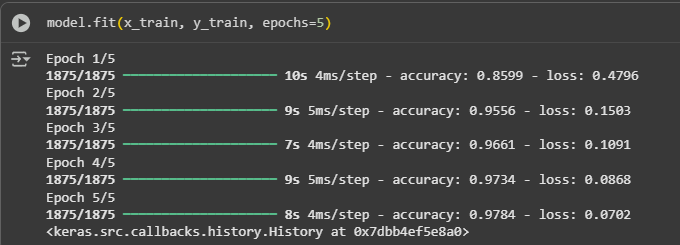

# 7-8 Задания

1.

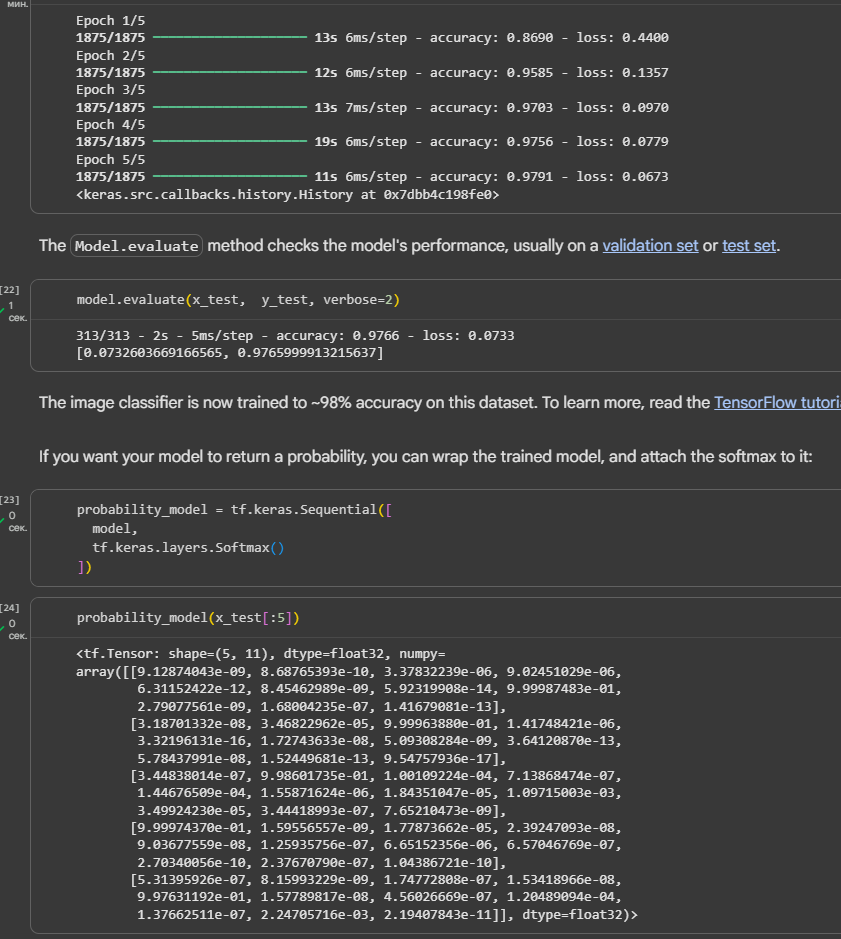

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(11)
])

2.
 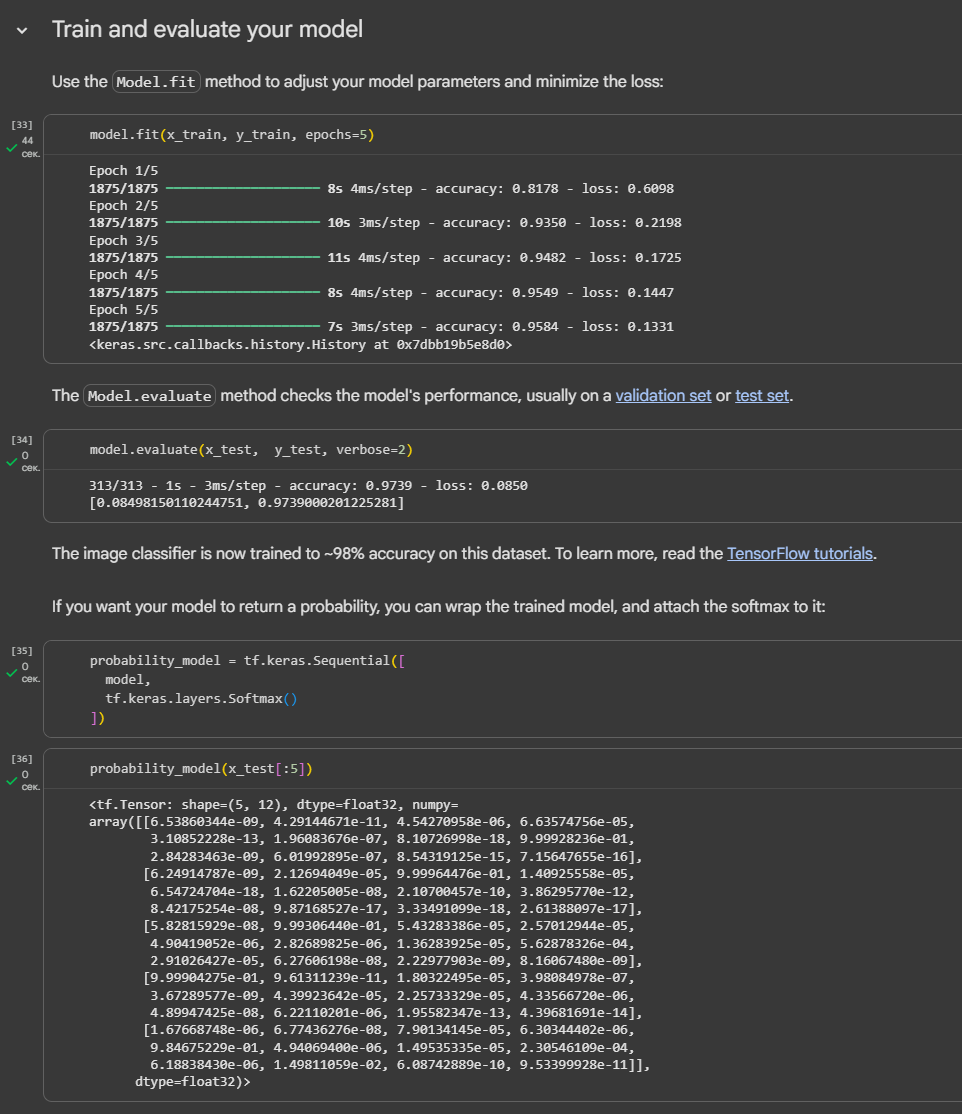

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(12)
])

3.
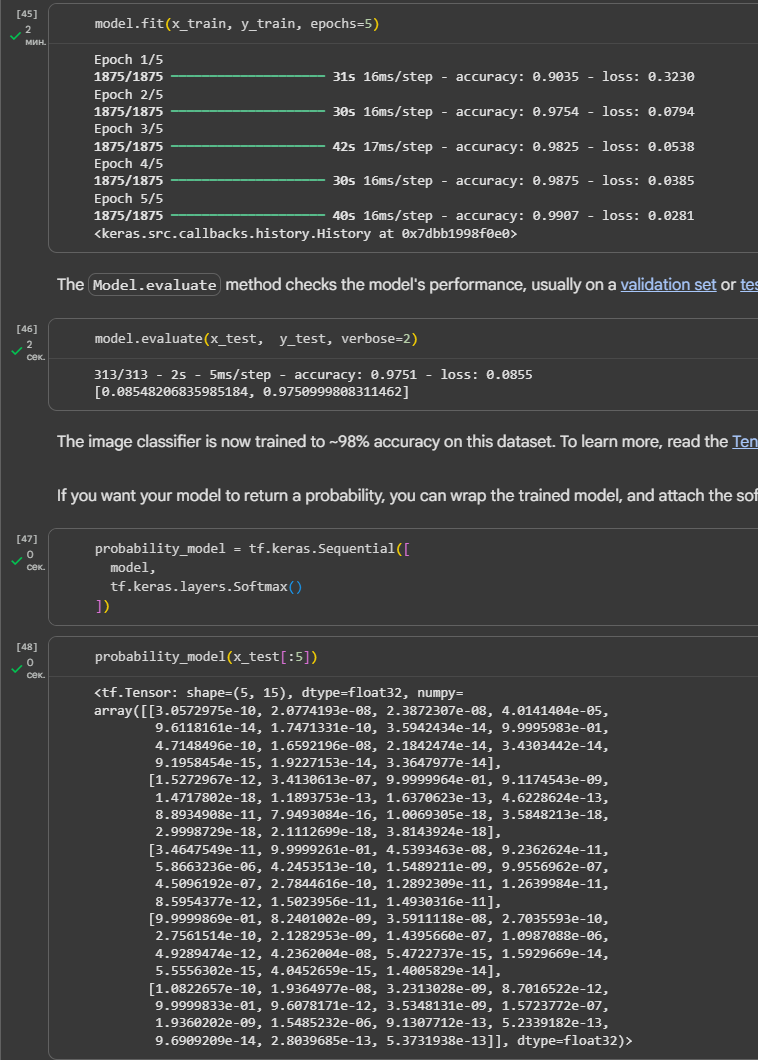

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(1200, activation='relu'),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(15)
])

# Вывод #9

Выводы о влиянии параметров:
1. Количество скрытых слоев:
Малые сети (1-2 слоя): Быстрее обучаются, меньше риск переобучения

Глубокие сети (3+ слоя): Могут выявлять сложные паттерны, но требуют больше данных и эпох

Оптимум: Для MNIST обычно 2-3 скрытых слоя достаточно

2. Количество нейронов:
Слишком мало: Недообучение, неспособность выучить сложные зависимости

Слишком много: Переобучение, медленное обучение

Рекомендация: Уменьшать количество нейронов в последующих слоях (например: 512 → 256 → 128)

3. Функции активации:
ReLU: Наиболее популярна, избегает проблемы исчезающего градиента

4. Количество эпох:
Слишком мало: Недообучение

Слишком много: Переобучение
